## F-I Curve for the SNNTorch Leaky (LIF) model

In [1]:
import snntorch as snn
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


In [2]:
data_range = []
i_range = np.arange(1.2,0,-0.01)

for i in i_range:
    data = torch.zeros((125))
    data[5:] = i
    data_range.append(data)

In [3]:
tao_mem = 0.03
timestep = 1 / 250
beta = np.exp(-timestep / tao_mem)

In [4]:
lif = snn.Leaky(beta=beta)

In [5]:
outputs = []
i = 0
for i_current in data_range:
    mem = lif.init_leaky()
    mem_rec = []
    spk_rec = []
    for t in range(125):
        spk, mem = lif(i_current[t], mem)

        spk_rec.append(spk)
        mem_rec.append(mem)

    # convert lists to tensors
    spk_rec = torch.stack(spk_rec).detach().cpu().numpy()
    mem_rec = torch.stack(mem_rec).detach().cpu().numpy()

    outputs.append((i_range[i], i_current, mem_rec, spk_rec))
    i+=1

In [6]:
outputs

[(1.2,
  tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
         

In [7]:
i_array = [x[0] for x in outputs]
f_array = [np.where(x[-1] == 1)[0].shape[0] for x in outputs]

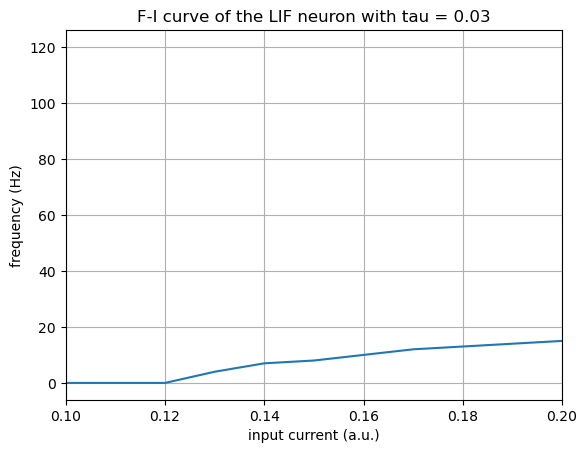

In [8]:
plt.title(f"F-I curve of the LIF neuron with tau = {tao_mem}")
plt.plot(i_array, f_array)
plt.xlabel("input current (a.u.)")
plt.ylabel("frequency (Hz)")
plt.grid()
plt.xlim([0.1,0.2])
plt.show()

In [21]:
# Find out the indices of all output tuples with input strength less than provided
input_strength = 0.2
index = [outputs.index(x) for x in outputs if x[0] <= input_strength]
print(index)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [10]:
def plot_strength(output_tuple, xlim=None, ylim=None):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))
    
    fig.suptitle(f"Input strength {output_tuple[0]}")
    
    ax[0].plot(output_tuple[1])
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    ax[0].set_xlabel('samples')
    ax[0].set_ylabel('input current (a.u.)')
    
    ax[1].plot(output_tuple[2])
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
    ax[1].set_xlabel('samples')
    ax[1].set_ylabel('membrane voltage (a.u.)')
    
    ax[2].plot(output_tuple[3])
    ax[2].set_xlim(xlim)
    ax[2].set_ylim(ylim)
    ax[2].set_xlabel('samples')
    ax[2].set_ylabel('spike event')
    
    plt.tight_layout()
    plt.show()
    
    print(f"spike_array == 1 at {len(np.where(output_tuple[3]==1)[0])} timepoints")

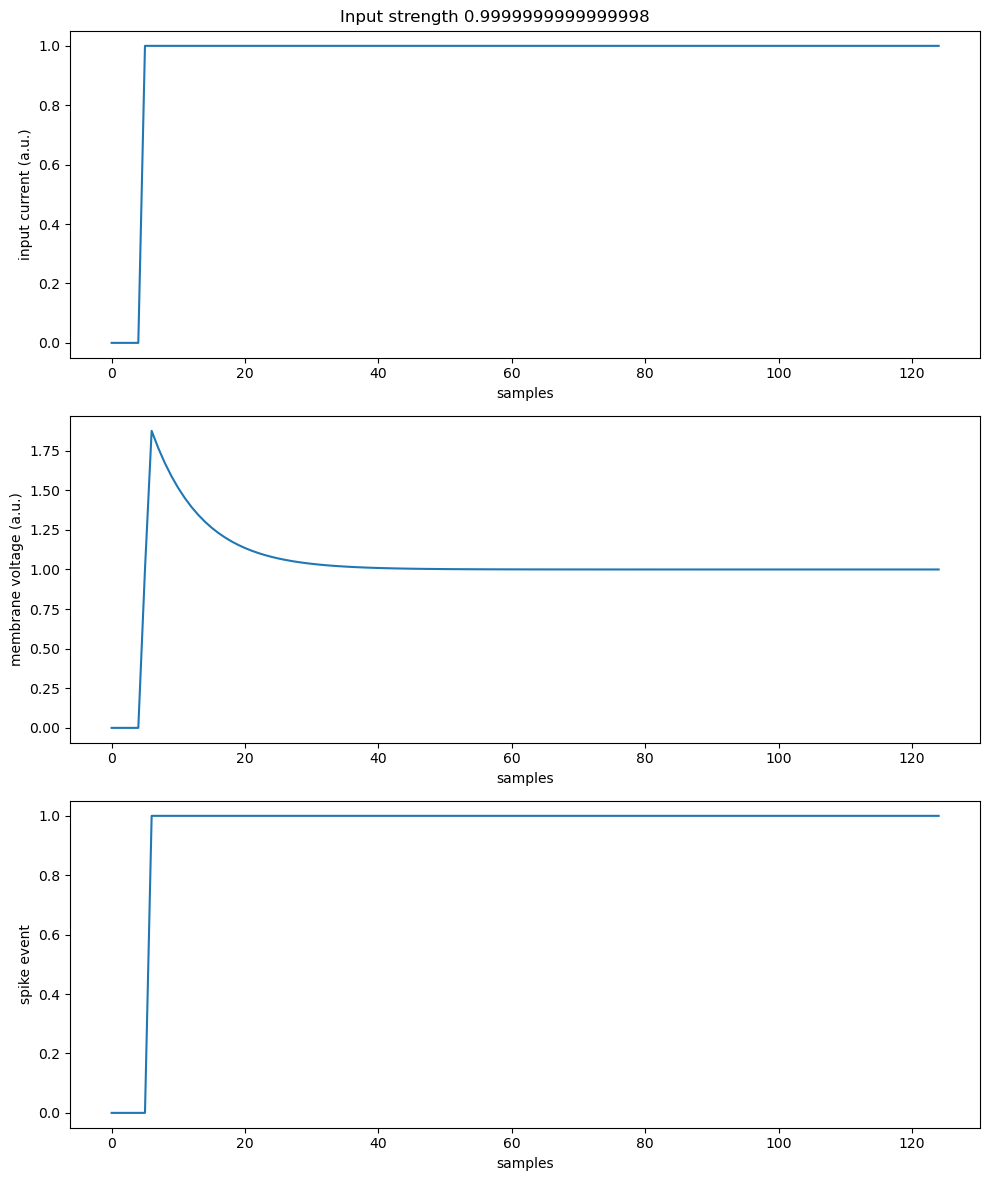

spike_array == 1 at 119 timepoints


In [11]:
plot_strength(outputs[20])

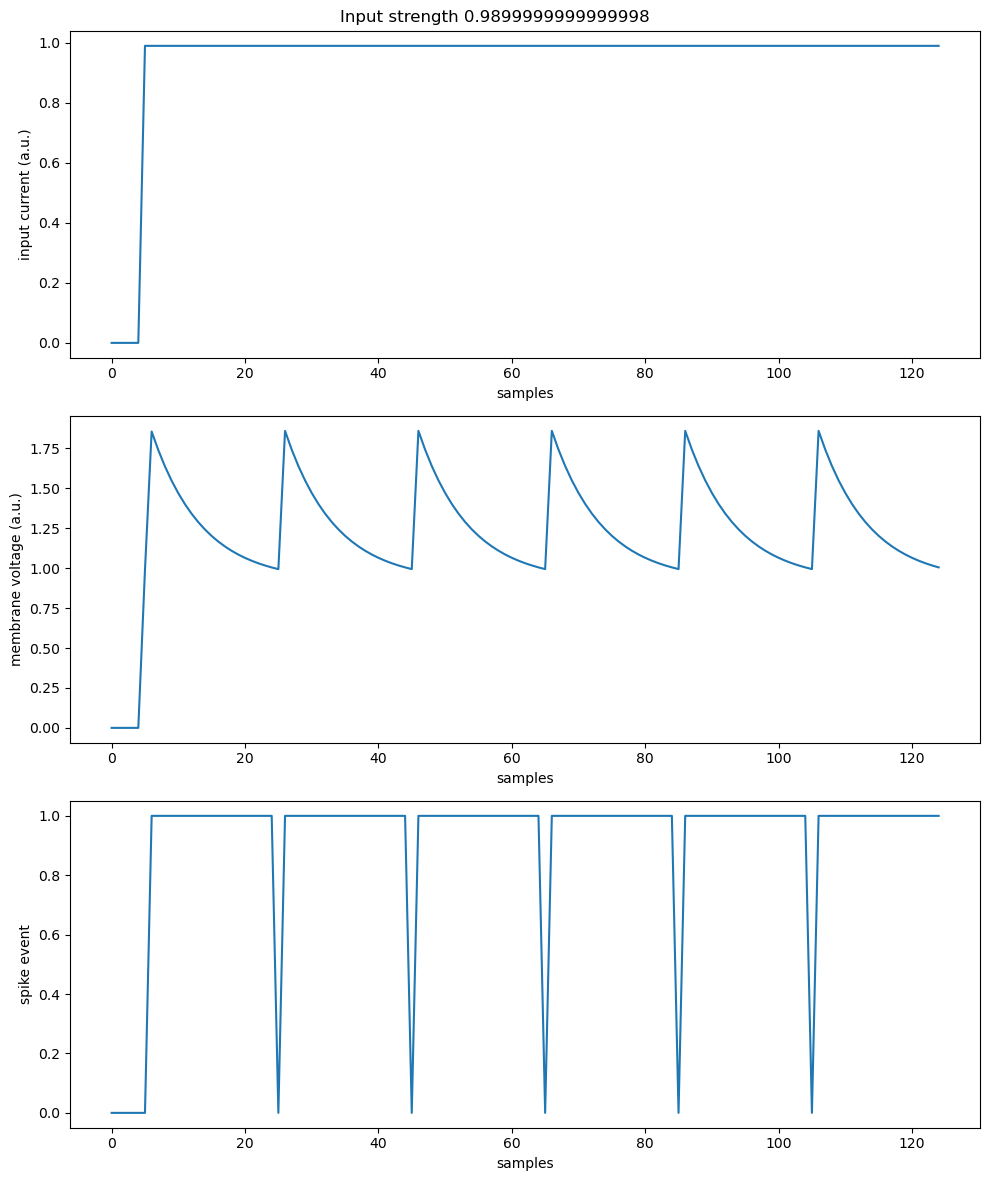

spike_array == 1 at 114 timepoints


In [12]:
plot_strength(outputs[21])

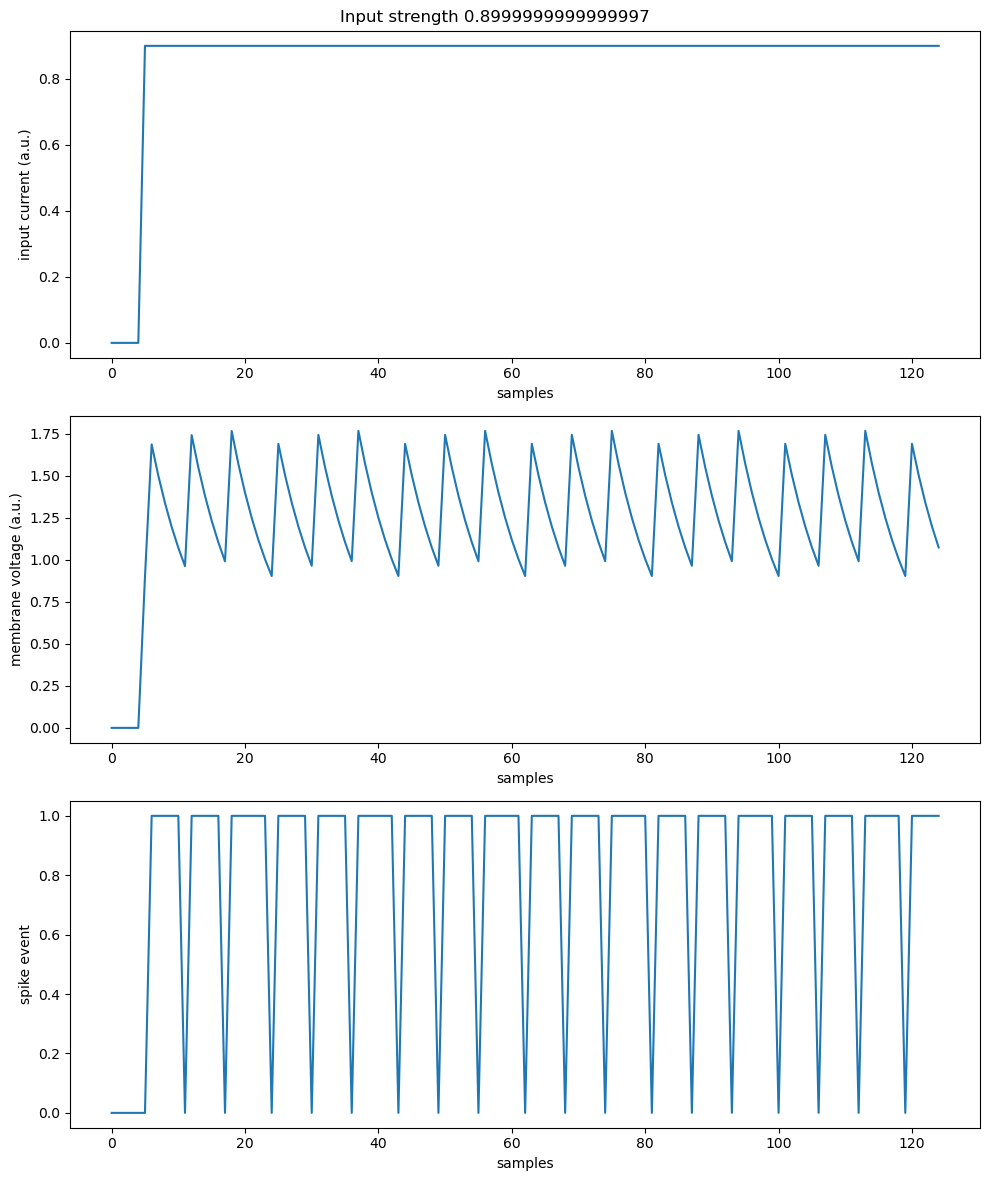

spike_array == 1 at 101 timepoints


In [13]:
plot_strength(outputs[30])

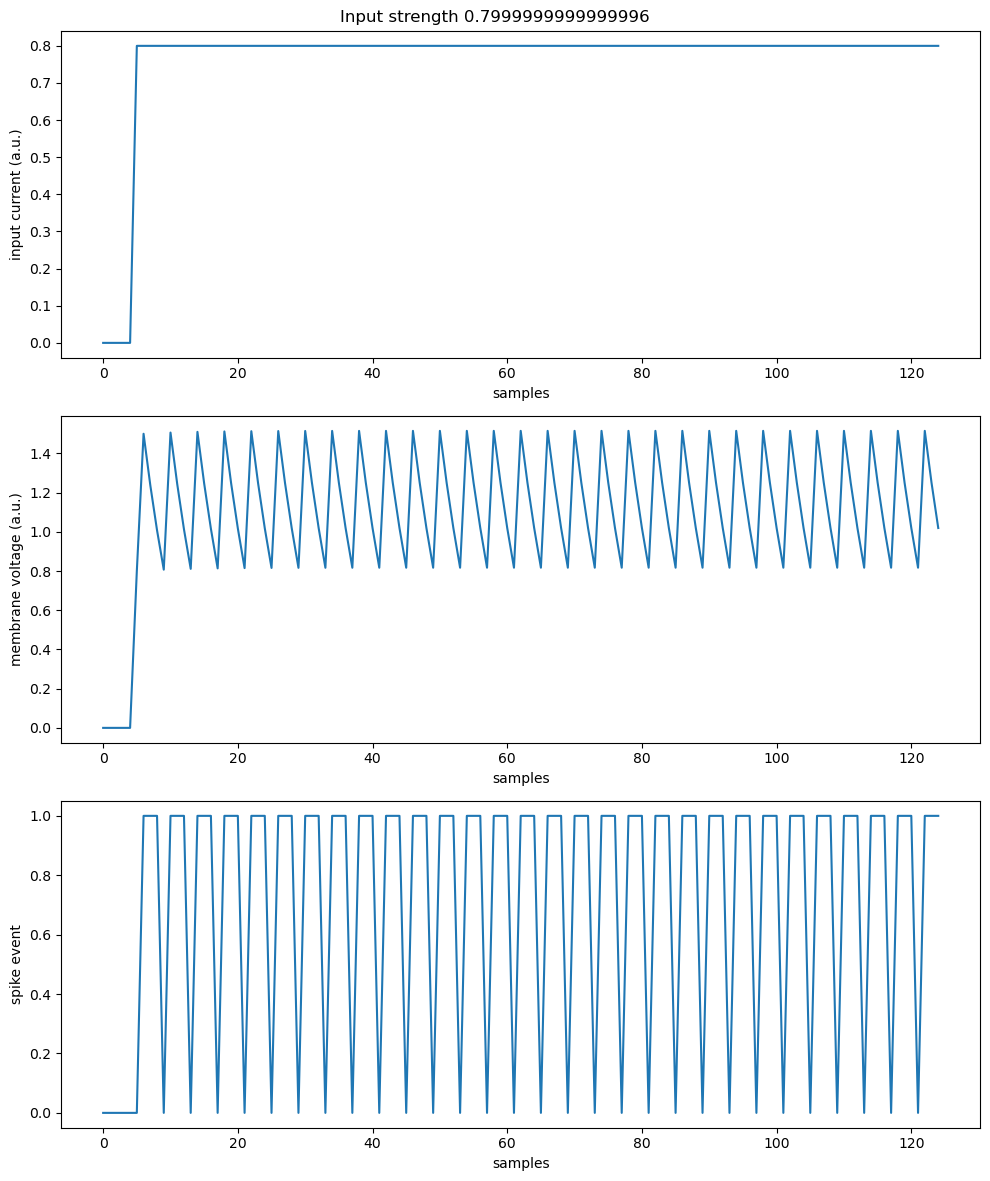

spike_array == 1 at 90 timepoints


In [14]:
plot_strength(outputs[40])

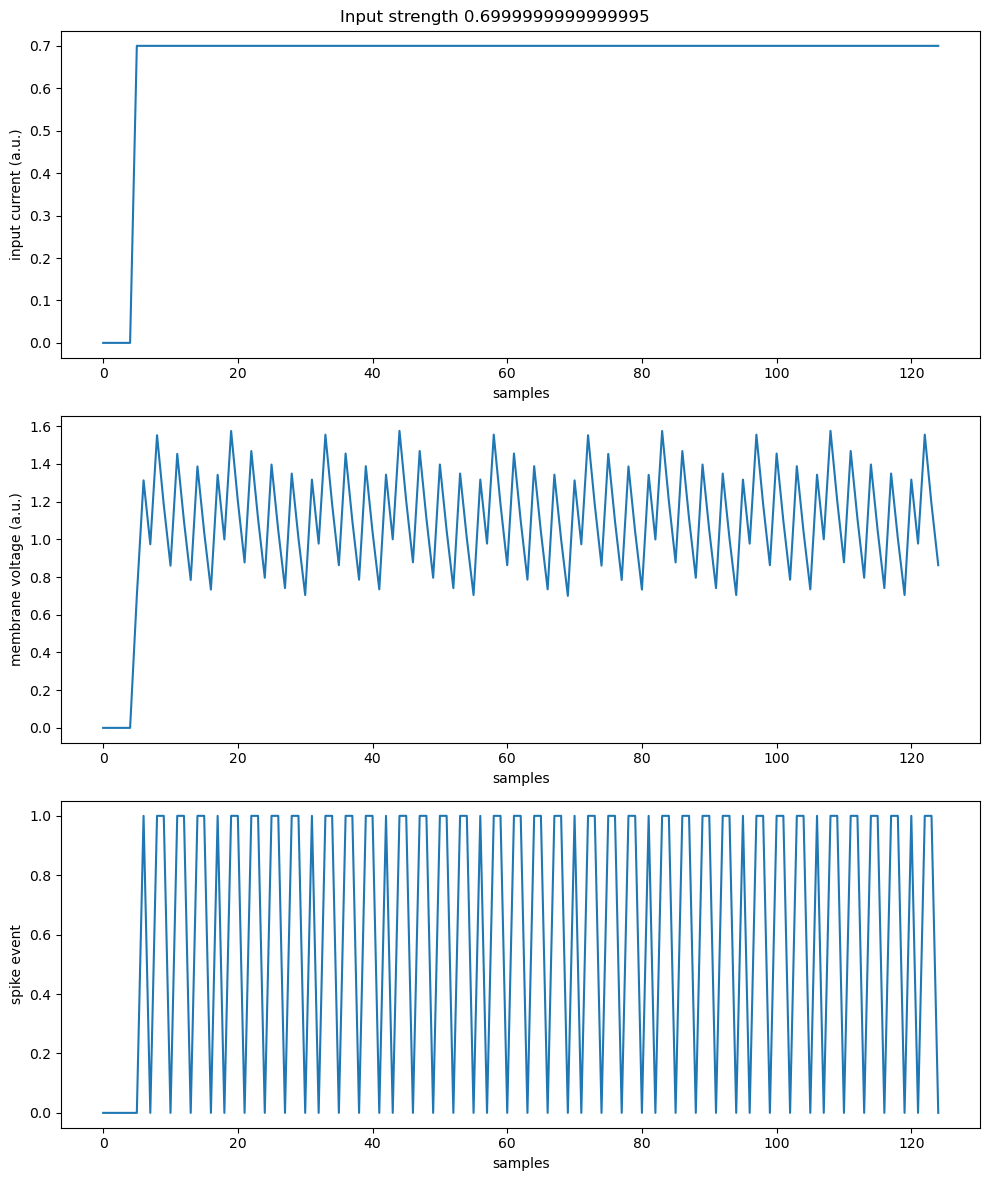

spike_array == 1 at 76 timepoints


In [15]:
plot_strength(outputs[50])

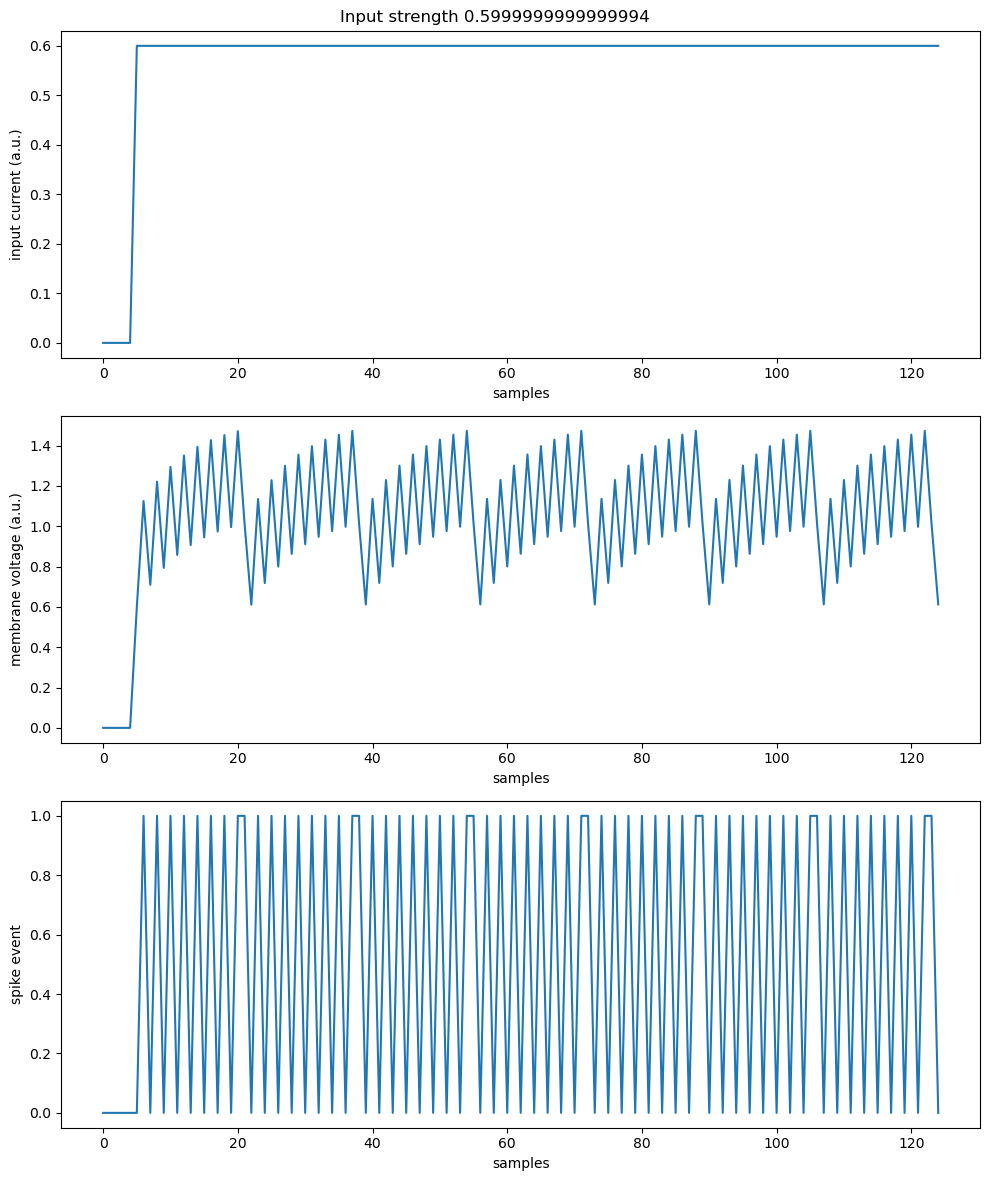

spike_array == 1 at 63 timepoints


In [16]:
plot_strength(outputs[60])

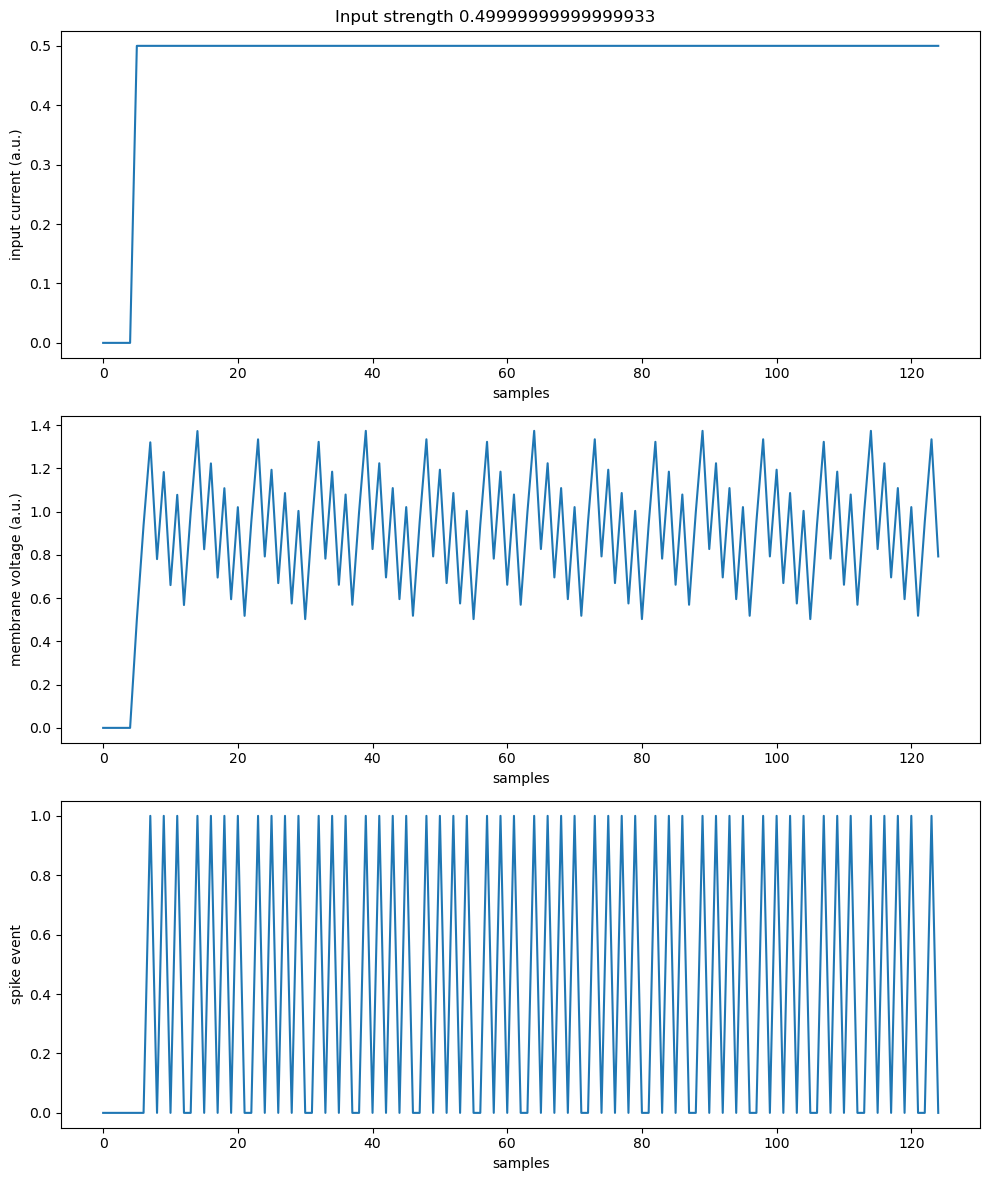

spike_array == 1 at 52 timepoints


In [17]:
plot_strength(outputs[70])

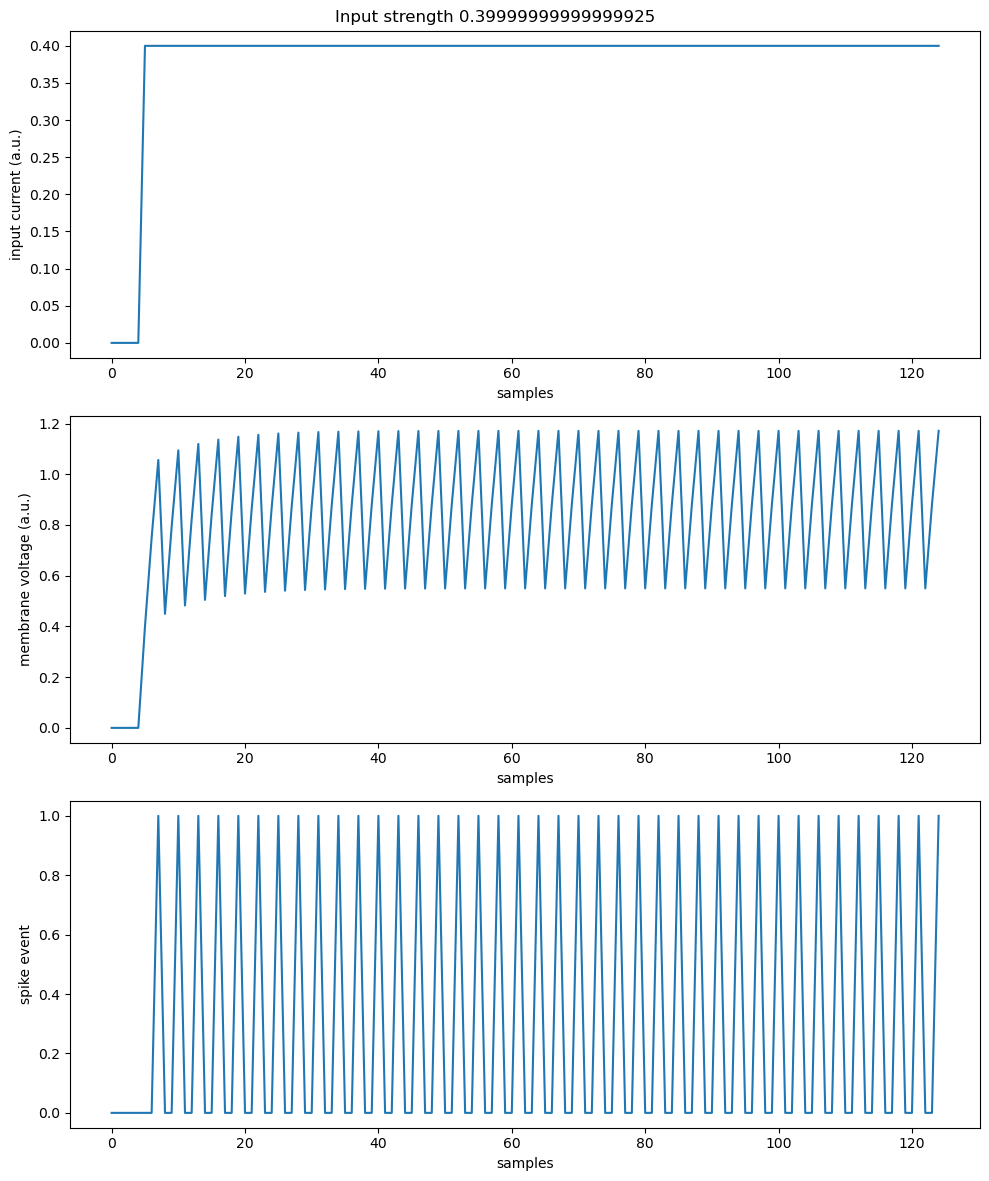

spike_array == 1 at 40 timepoints


In [18]:
plot_strength(outputs[80])

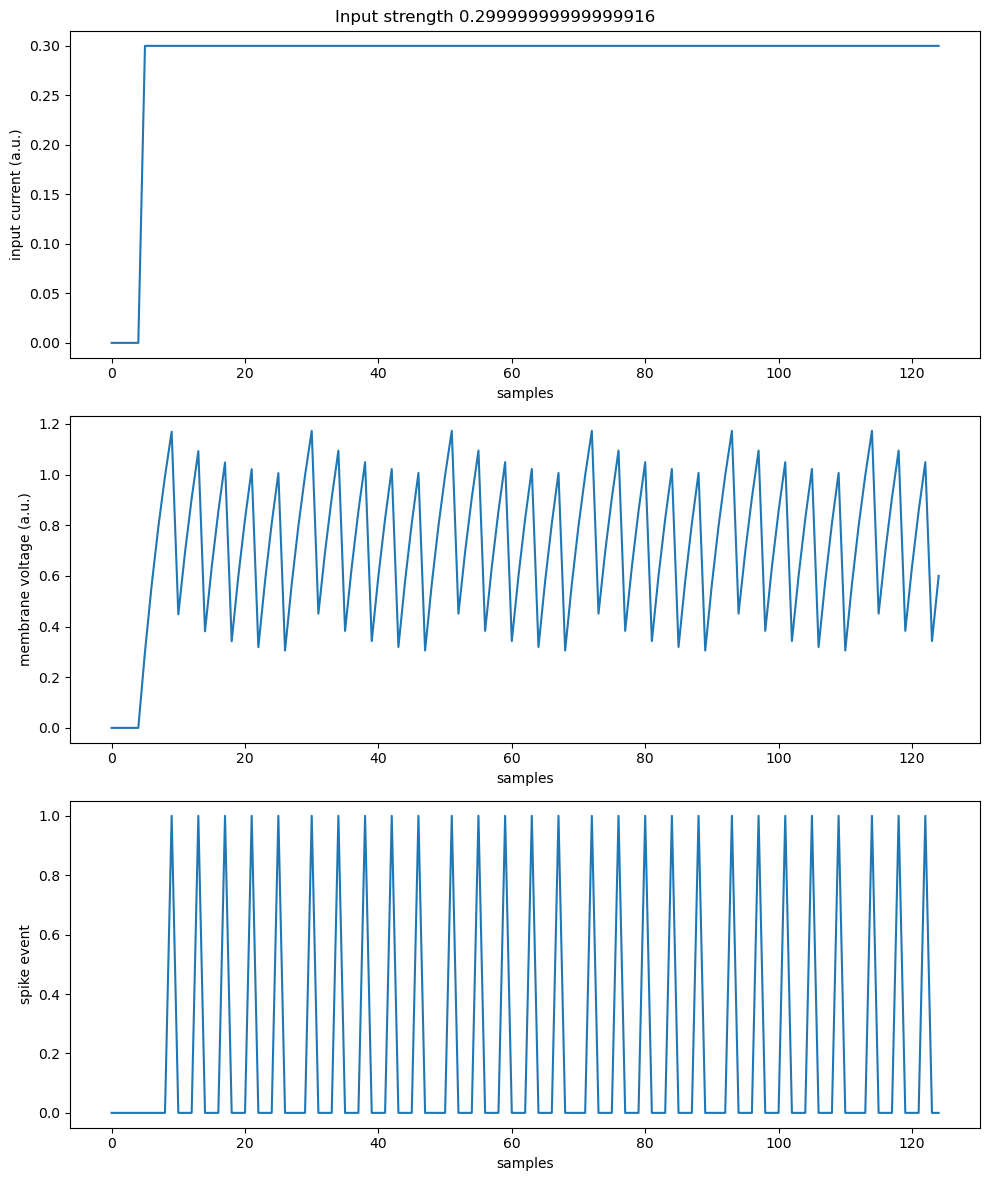

spike_array == 1 at 28 timepoints


In [20]:
plot_strength(outputs[90])

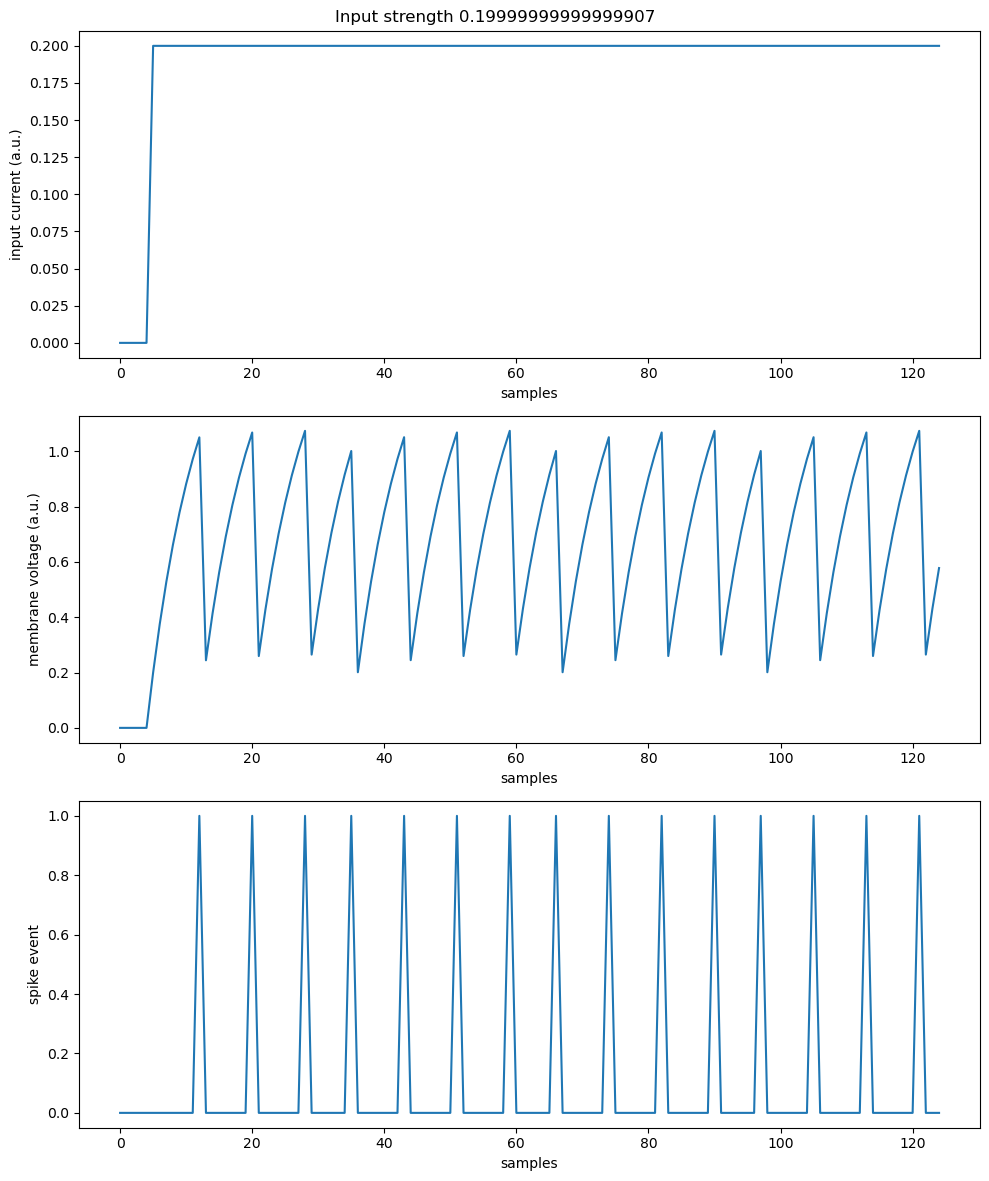

spike_array == 1 at 15 timepoints


In [22]:
plot_strength(outputs[100])

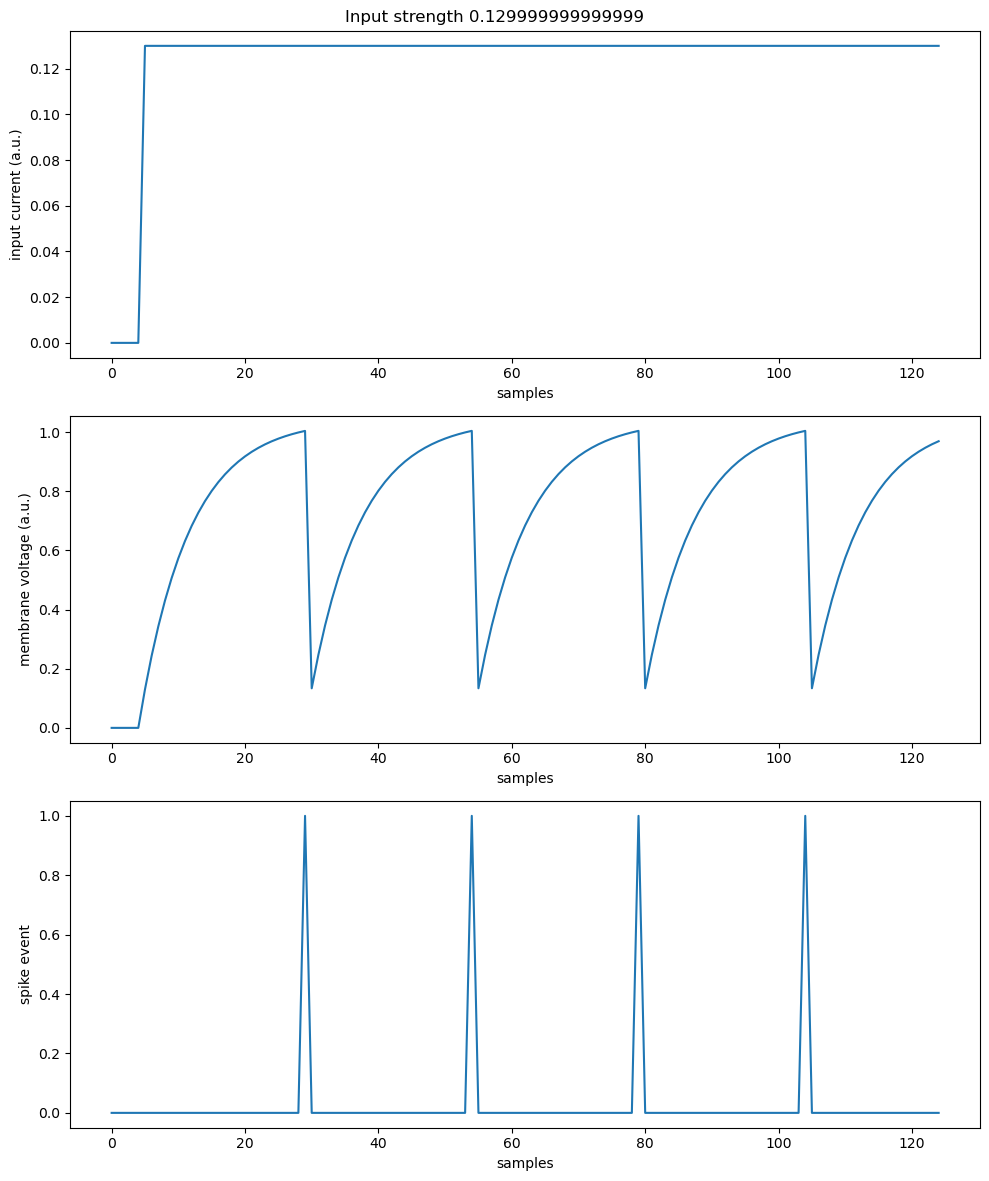

spike_array == 1 at 4 timepoints


In [29]:
plot_strength(outputs[107]) # lowest number of spikes produced = rheobase

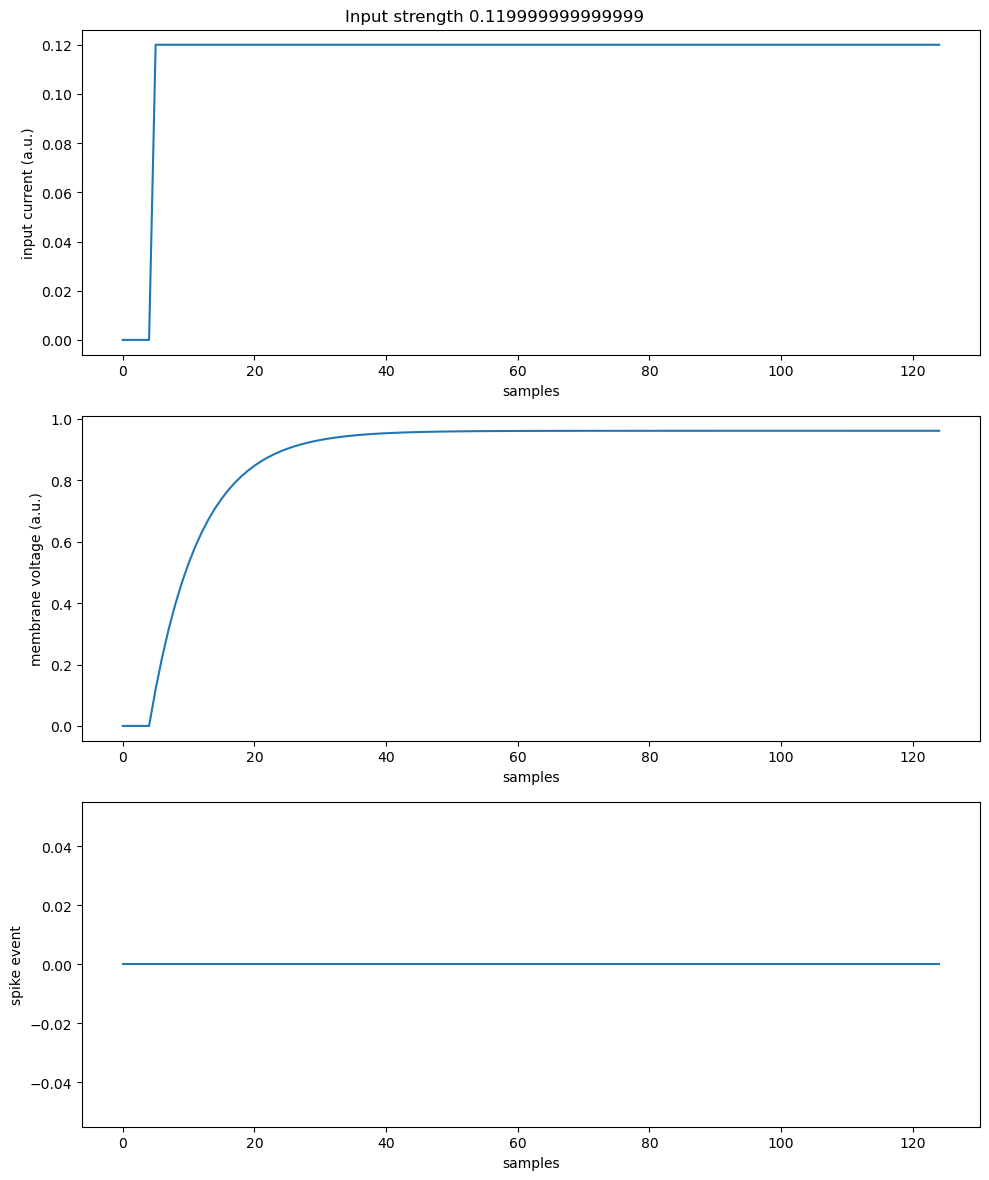

spike_array == 1 at 0 timepoints


In [30]:
plot_strength(outputs[108])

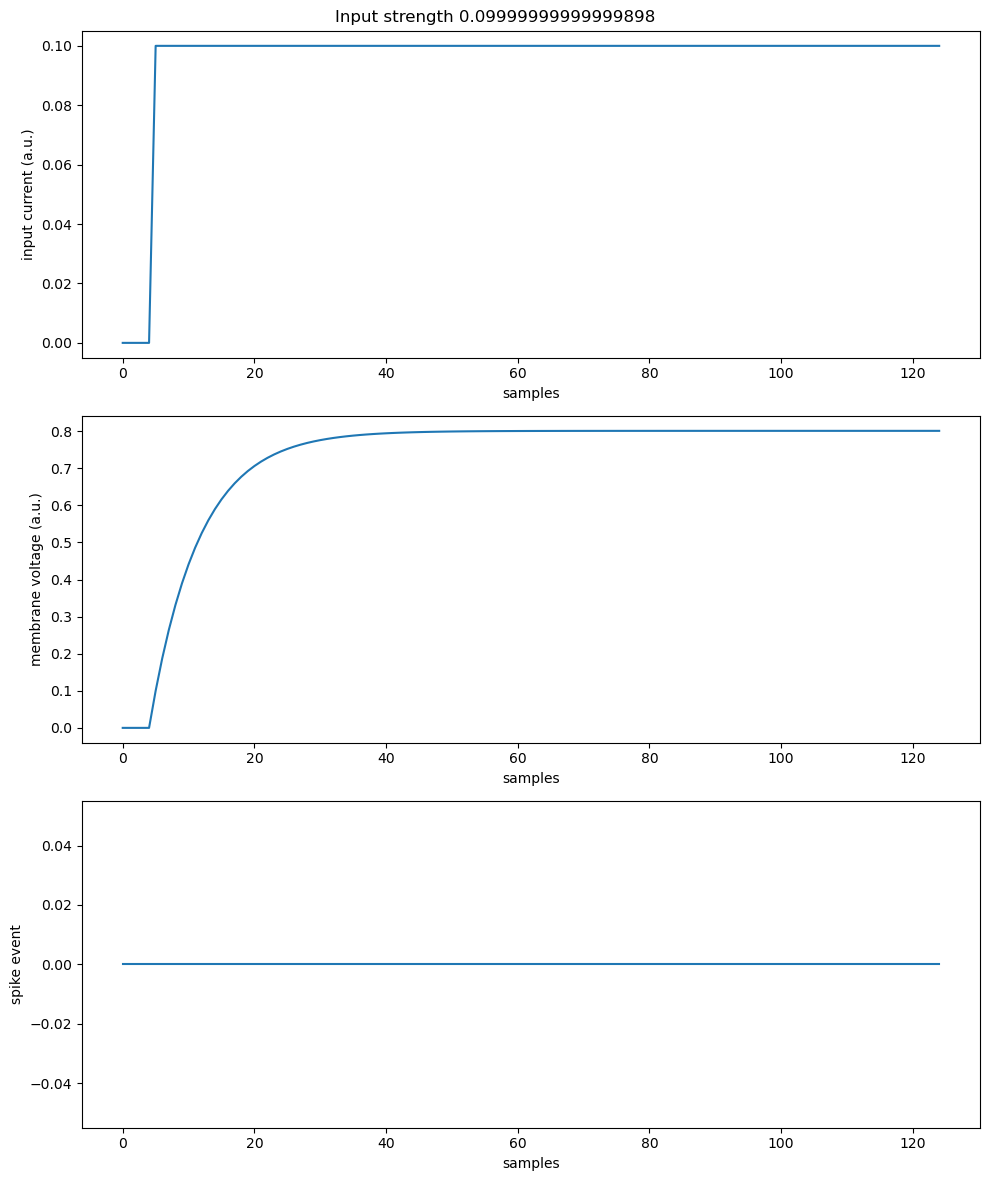

spike_array == 1 at 0 timepoints


In [25]:
plot_strength(outputs[110])